In [1]:
from typing import Callable

import torch
import numpy
import matplotlib.pyplot as plt

from utilities import CostParameters, least_square_cost, ridge_cost

In [2]:
torch.set_default_dtype(torch.float64)
if torch.cuda.is_available():
    torch.set_default_device("cuda")

In [3]:
TEST_DATA_SIZE = 100
X = numpy.random.rand(TEST_DATA_SIZE, 1)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)

In [4]:
input_layer = 1
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, cost_func: Callable[[CostParameters], torch.Tensor], print_debug_info: bool = False) -> None:
    x_tensor = torch.tensor(X)
    y_tensor = torch.tensor(Y)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True)
    biases_layer2 = torch.rand(output_layer, requires_grad=True)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()

        cost_params = CostParameters(y_tensor, predicted, [weights_layer1, weights_layer2], [biases_layer1, biases_layer2])
        loss = cost_func(cost_params)

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    plt.title(f"Training a 2D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")
    plt.scatter(X, Y)
    plt.plot(X, final_prediction)
    plt.show()

Info at epoch #500:
Loss: 8.990926774032923
Info at epoch #1000:
Loss: 8.814371021864716
Info at epoch #1500:
Loss: 8.738526507006345
Info at epoch #2000:
Loss: 8.67186122275006
Info at epoch #2500:
Loss: 8.61093113002824
Info at epoch #3000:
Loss: 8.554990924597687
Info at epoch #3500:
Loss: 8.503474567472201
Info at epoch #4000:
Loss: 8.455902503545108
Info at epoch #4500:
Loss: 8.411864650156893
Info at epoch #5000:
Loss: 8.37100858391426


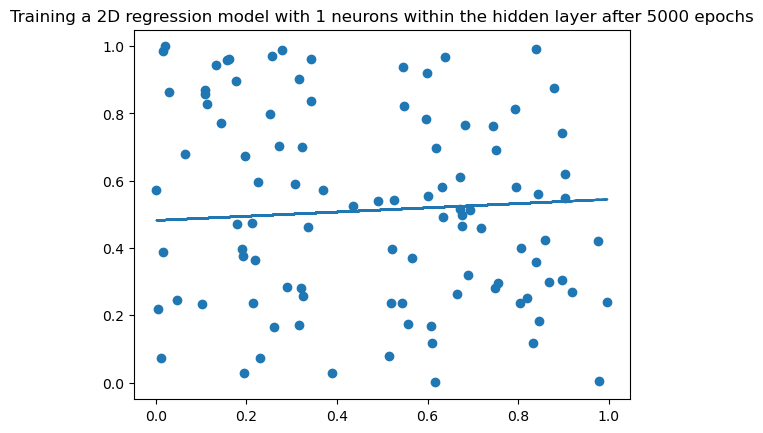

Info at epoch #500:
Loss: 11.941166176001602
Info at epoch #1000:
Loss: 10.436094726541288
Info at epoch #1500:
Loss: 9.488253242419022
Info at epoch #2000:
Loss: 8.883719030806832
Info at epoch #2500:
Loss: 8.495897195381314
Info at epoch #3000:
Loss: 8.246484547360604
Info at epoch #3500:
Loss: 8.08599237370149
Info at epoch #4000:
Loss: 7.982765092154459
Info at epoch #4500:
Loss: 7.916432737504429
Info at epoch #5000:
Loss: 7.873856688924429


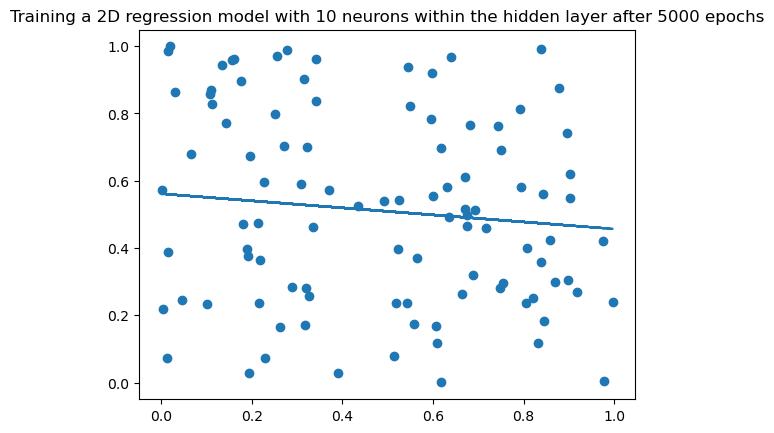

Info at epoch #500:
Loss: 14.376284030607426
Info at epoch #1000:
Loss: 8.06798216948346
Info at epoch #1500:
Loss: 7.809204847862549
Info at epoch #2000:
Loss: 7.798575526441869
Info at epoch #2500:
Loss: 7.798139047311911
Info at epoch #3000:
Loss: 7.798121125284548
Info at epoch #3500:
Loss: 7.798120389410576
Info at epoch #4000:
Loss: 7.798120359195883
Info at epoch #4500:
Loss: 7.798120357955277
Info at epoch #5000:
Loss: 7.798120357904337


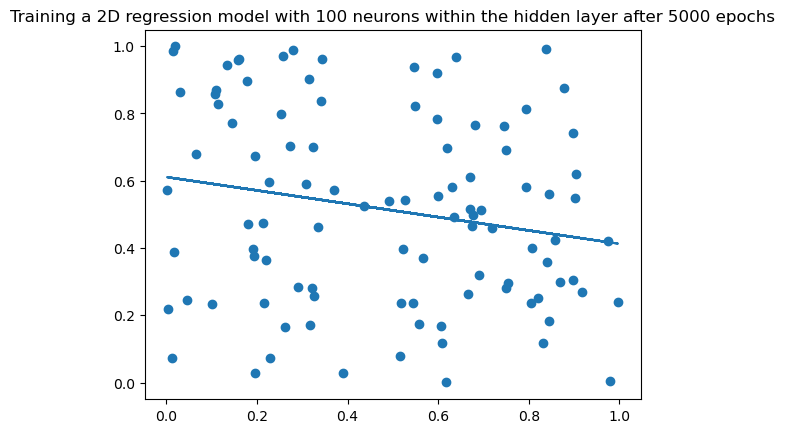

In [5]:
train(1, 5_000, least_square_cost, print_debug_info=True)
train(10, 5_000, least_square_cost, print_debug_info=True)
train(100, 5_000, least_square_cost, print_debug_info=True)


Info at epoch #500:
Loss: 9.6900318288859
Info at epoch #1000:
Loss: 9.073444214635643
Info at epoch #1500:
Loss: 8.994709529779929
Info at epoch #2000:
Loss: 8.940673490592042
Info at epoch #2500:
Loss: 8.891108033449637
Info at epoch #3000:
Loss: 8.844857502118671
Info at epoch #3500:
Loss: 8.80157628813366
Info at epoch #4000:
Loss: 8.760987723823662
Info at epoch #4500:
Loss: 8.722849103206398
Info at epoch #5000:
Loss: 8.68694597319486


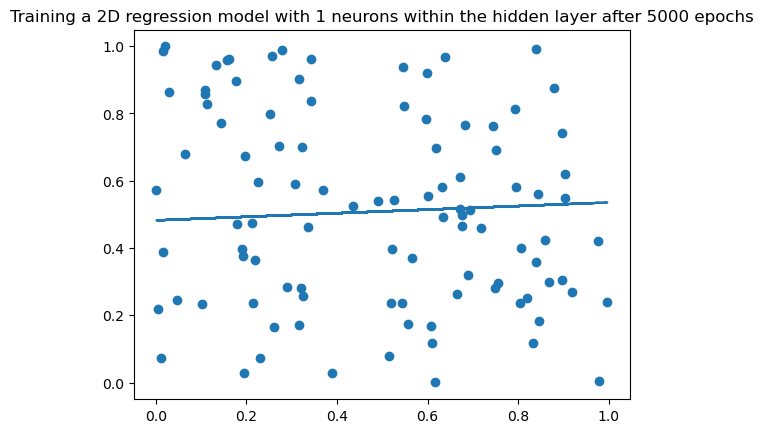

Info at epoch #500:
Loss: 12.520636543586592
Info at epoch #1000:
Loss: 11.319036804522586
Info at epoch #1500:
Loss: 10.562322432412515
Info at epoch #2000:
Loss: 10.077678697792408
Info at epoch #2500:
Loss: 9.764156088709942
Info at epoch #3000:
Loss: 9.55984108399027
Info at epoch #3500:
Loss: 9.425879670645534
Info at epoch #4000:
Loss: 9.337519233821434
Info at epoch #4500:
Loss: 9.278835611275015
Info at epoch #5000:
Loss: 9.239518835680215


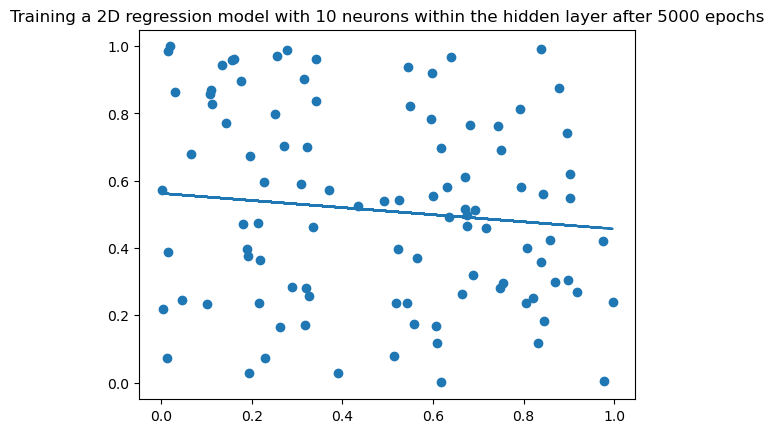

Info at epoch #500:
Loss: 16.81553779366027
Info at epoch #1000:
Loss: 12.380134049026607
Info at epoch #1500:
Loss: 12.233211421387981
Info at epoch #2000:
Loss: 12.225989164787727
Info at epoch #2500:
Loss: 12.223334766355384
Info at epoch #3000:
Loss: 12.220830254131112
Info at epoch #3500:
Loss: 12.21833067954072
Info at epoch #4000:
Loss: 12.215831269377404
Info at epoch #4500:
Loss: 12.213331865962235
Info at epoch #5000:
Loss: 12.210832464090327


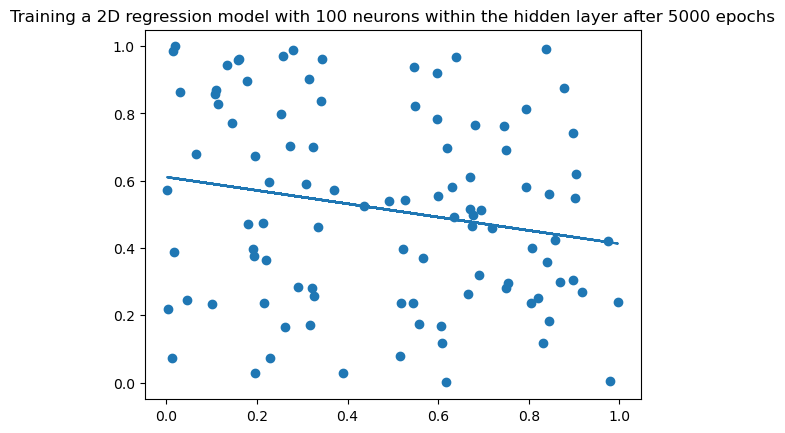

In [6]:
train(1, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(10, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)
train(100, 5_000, ridge_cost(least_square_cost, 0.5), print_debug_info=True)